In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [236]:
test1_df = pd.read_csv('SE_rents2018_test1.csv', index_col=0)
test2_df = pd.read_csv('SE_rents2018_test2.csv', index_col=0)
test3_df = pd.read_csv('SE_rents2018_test3.csv', index_col=0)
train_df = pd.read_csv('SE_rents2018_train.csv', index_col=0)
# bedrooms, bathrooms, size_sqft, and year_built use for linear model.
# borough, neighborhood, has_doorman, and size_sqft for non-linear model. 

rent                      1.000000
size_sqft                 0.599615
bathrooms                 0.564844
bedrooms                  0.287208
has_gym                   0.280449
has_doorman               0.280098
has_washer_dryer          0.279174
has_concierge             0.276204
floornumber               0.267987
floor_count               0.259968
has_elevator              0.252661
has_dishwasher            0.240389
has_childrens_playroom    0.205806
has_roofdeck              0.197563
allows_pets               0.190371
has_fireplace             0.187133
has_pool                  0.181578
has_garden                0.154271
has_garage                0.141311
addr_lat                  0.093405
is_furnished              0.093132
no_fee                    0.042568
year_built                0.015479
building_id              -0.029125
min_to_subway            -0.055788
addr_lon                 -0.248265
bin                      -0.302028
addr_zip                 -0.302758
bbl                 

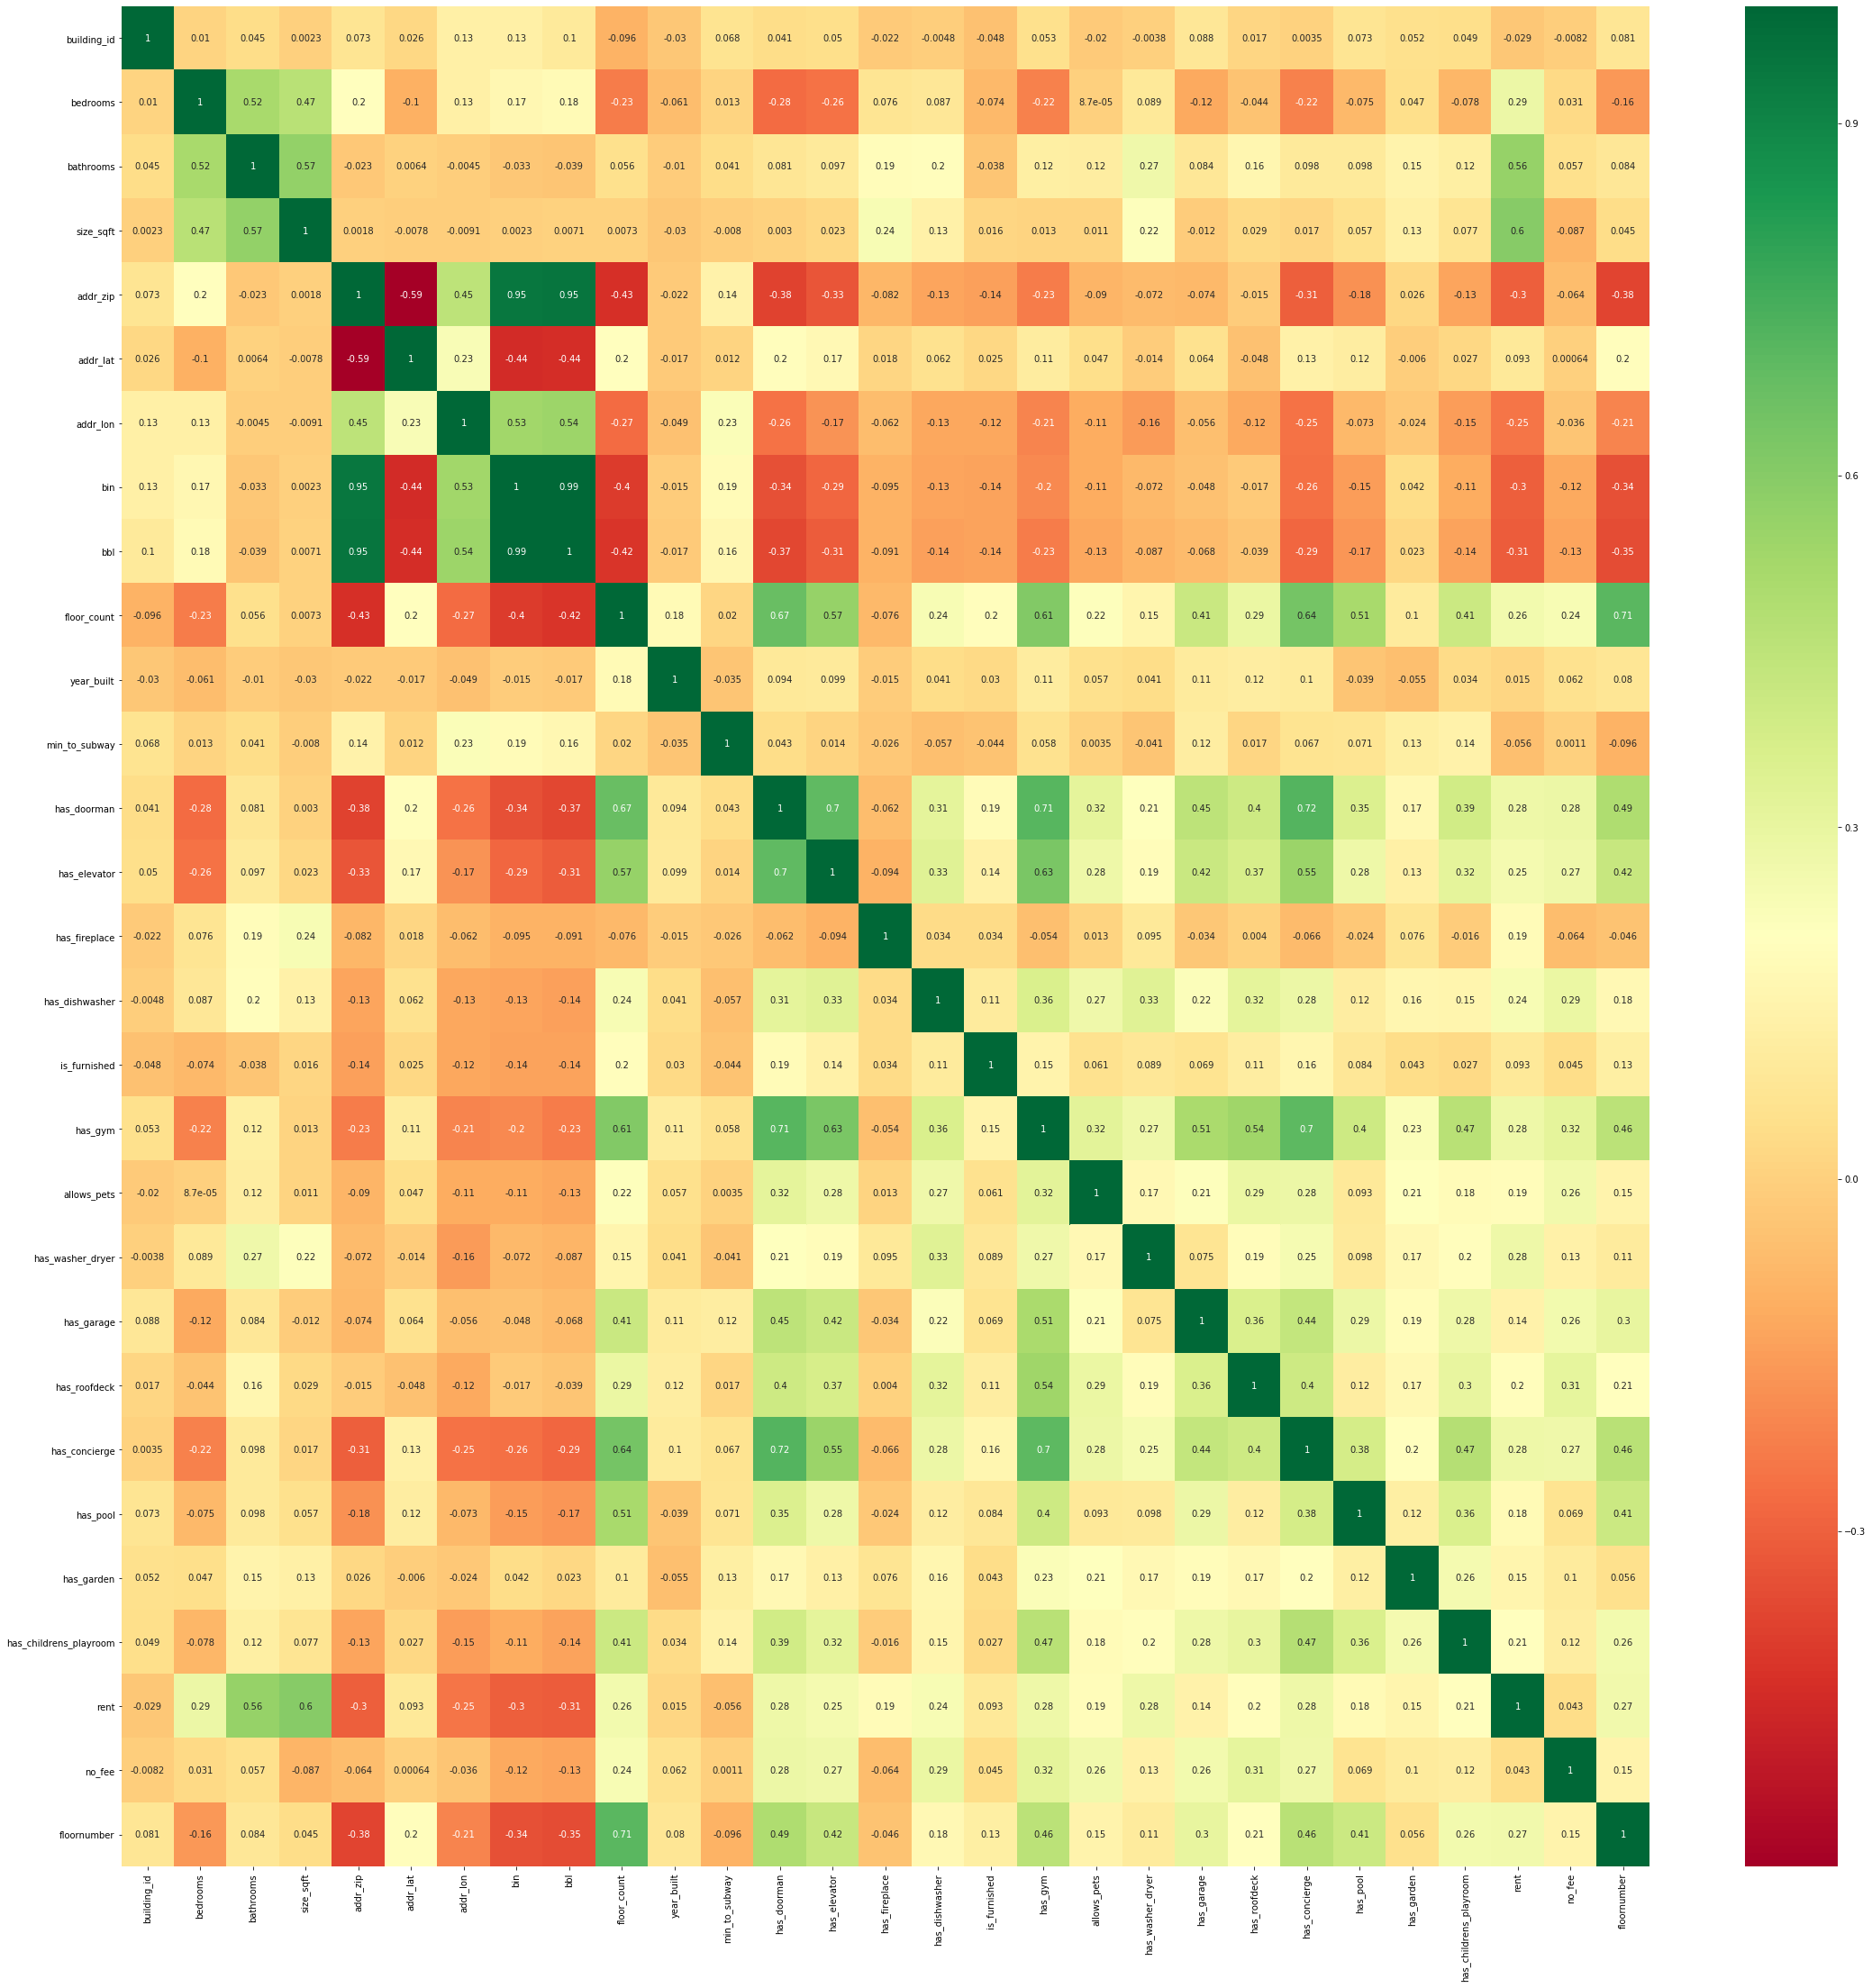

In [237]:
#using a heatmap to select meaningful features
#columns = test1_df[:,0:29]
#target = test1_df.rent
corrmat = test1_df.corr()
test1_top_corr = corrmat.index
plt.figure(figsize=(38,38))
test1_g = sns.heatmap(test1_df[test1_top_corr].corr(), annot=True, cmap="RdYlGn")
rentCorr = test1_df.corr()["rent"]
rentCorr = rentCorr.sort_values(ascending=False)
print(rentCorr)
s_columns_needed = list(rentCorr.keys())[1:5]
#s_columns_needed.append("bbl")
s_columns_needed.extend(list(rentCorr.keys())[-3:])
s_columns_needed.append("rent")
print(s_columns_needed)
s_features = s_columns_needed
s_features.remove("rent")
print(s_features)

In [238]:
print(train_df.shape)
train_df.isna().sum()

(12000, 38)


addr_unit                   91
building_id                  0
bedrooms                     0
bathrooms                    0
size_sqft                    0
created_at                   0
addr_street                  0
addr_city                    0
addr_zip                     0
addr_lat                     0
addr_lon                     0
bin                          1
bbl                          0
floor_count                  0
year_built                 403
min_to_subway              126
has_doorman                  0
has_elevator                 0
has_fireplace                0
has_dishwasher               0
is_furnished                 0
has_gym                      0
allows_pets                  0
has_washer_dryer             0
has_garage                   0
has_roofdeck                 0
has_concierge                0
has_pool                     0
has_garden                   0
has_childrens_playroom       0
rent                         0
no_fee                       0
descript

In [239]:
mv_percentages = train_df.isna().sum()/len(train_df)*100
mv_percentages

addr_unit                  0.758333
building_id                0.000000
bedrooms                   0.000000
bathrooms                  0.000000
size_sqft                  0.000000
created_at                 0.000000
addr_street                0.000000
addr_city                  0.000000
addr_zip                   0.000000
addr_lat                   0.000000
addr_lon                   0.000000
bin                        0.008333
bbl                        0.000000
floor_count                0.000000
year_built                 3.358333
min_to_subway              1.050000
has_doorman                0.000000
has_elevator               0.000000
has_fireplace              0.000000
has_dishwasher             0.000000
is_furnished               0.000000
has_gym                    0.000000
allows_pets                0.000000
has_washer_dryer           0.000000
has_garage                 0.000000
has_roofdeck               0.000000
has_concierge              0.000000
has_pool                   0

In [240]:
for name, percent in mv_percentages.iteritems():
    if(percent<5 and percent > 0):
        train_df = train_df[pd.notnull(train_df[name])]
train_df.shape

(11371, 38)

In [241]:
from pandas.api.types import is_numeric_dtype
mv_percentages_step2 = train_df.isna().sum()/len(train_df)*100
for name, percent in mv_percentages_step2.iteritems():
    if(percent>=5):
        print(name + ": " + str(train_df[name].value_counts().idxmax()))
        if(is_numeric_dtype(train_df[name])):
            train_df[name].fillna(train_df[name].mean(), inplace=True)
        else:
            train_df[name].fillna(train_df[name].value_counts().idxmax(), inplace=True)

floornumber: 2.0
line: A


In [242]:
train_df.isna().sum()

addr_unit                 0
building_id               0
bedrooms                  0
bathrooms                 0
size_sqft                 0
created_at                0
addr_street               0
addr_city                 0
addr_zip                  0
addr_lat                  0
addr_lon                  0
bin                       0
bbl                       0
floor_count               0
year_built                0
min_to_subway             0
has_doorman               0
has_elevator              0
has_fireplace             0
has_dishwasher            0
is_furnished              0
has_gym                   0
allows_pets               0
has_washer_dryer          0
has_garage                0
has_roofdeck              0
has_concierge             0
has_pool                  0
has_garden                0
has_childrens_playroom    0
rent                      0
no_fee                    0
description               0
neighborhood              0
borough                   0
unit                

Text(0.5, 0, 'bbl')

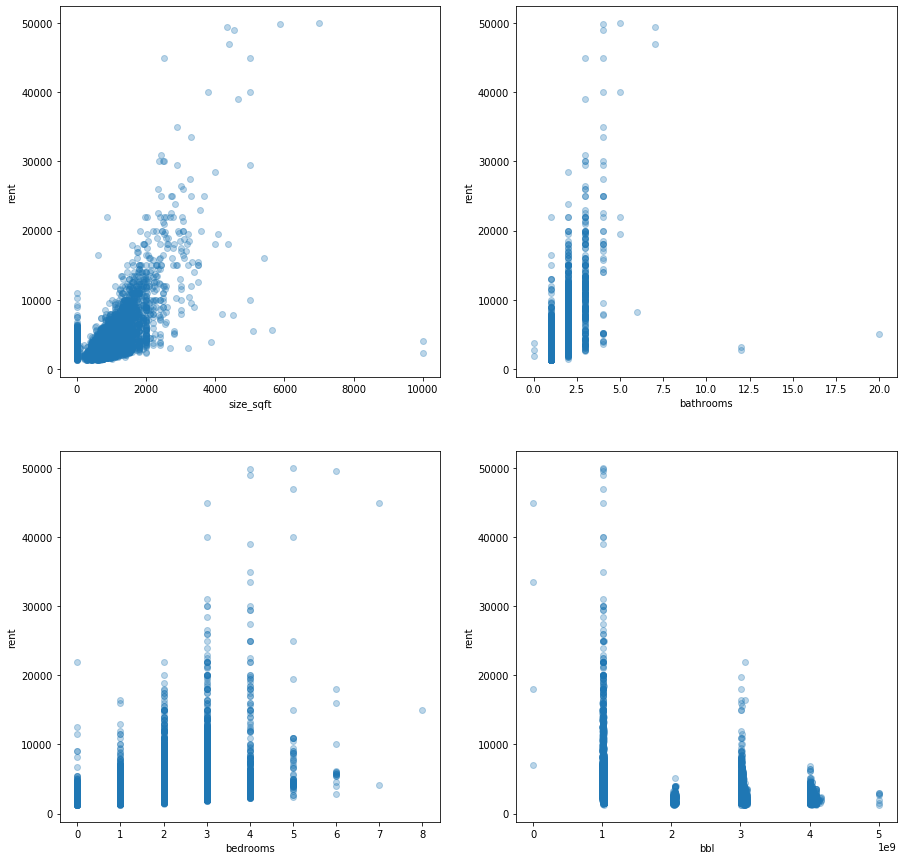

In [243]:
relfeatures_df = train_df[['size_sqft', 'bathrooms', 'bedrooms', 'has_gym', 'bin', 'addr_zip', 'bbl', 'rent']].copy()


fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(relfeatures_df["size_sqft"], relfeatures_df["rent"], alpha=0.3)
ax1.set_ylabel("rent")
ax1.set_xlabel("size_sqft")


ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(relfeatures_df["bathrooms"], relfeatures_df["rent"], alpha=0.3)
ax2.set_ylabel("rent")
ax2.set_xlabel("bathrooms")

ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(relfeatures_df["bedrooms"], relfeatures_df["rent"], alpha=0.3)
ax3.set_ylabel("rent")
ax3.set_xlabel("bedrooms")

ax4 = fig.add_subplot(2, 2, 4)
ax4.scatter(relfeatures_df["bbl"], relfeatures_df["rent"], alpha=0.3)
ax4.set_ylabel("rent")
ax4.set_xlabel("bbl")

In [247]:
# removing outliers increased mse

# print(relfeatures_df[relfeatures_df["size_sqft"]>5000])
# train_df = train_df[train_df["size_sqft"]<5000]
# print(relfeatures_df[relfeatures_df["size_sqft"]<5])
# train_df = train_df[train_df["size_sqft"]>5]
# print(relfeatures_df[relfeatures_df["bathrooms"]>7])
# train_df = train_df[train_df["bathrooms"]<7]
# print(train_df[train_df["rent"]>30000])

# train_df = train_df[train_df["bbl"] > 0]
# relfeatures_df.shape

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def train_linear_reg_model(X_train, y_train, X_test, y_test):
    """Trains and test linear regression model and returns mean_squared_error of
    y_test and y_predicted. 
    ----------
    X_train : data frame, shape = [n_samples, n_features]
        n_samples the number of samples
        n_features the number of features for each sample.
        
    y_train : data frame, shape = [n_samples]
        n_sample target values.
        
    X_test : data frame, shape = [n_samples, n_features]
        n_samples the number of samples
        n_features the number of features for each sample.
        
    y_test : data frame, shape = [n_samples]
        n_sample target values.
        
    Return 
        (data frame) y_prediction: predictions made from X_test
        (float) mean_squared_error of (y_test and y_prediction)
        (LinearRegression) returns the linear regression model.
    """

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_prediction = lr.predict(X_test)
    
    return lr ,y_prediction, mean_squared_error(y_test, y_prediction)

In [245]:
columns_needed = ['size_sqft', 'bathrooms', 'has_gym', 'has_doorman', 'bin', 'bbl', 'rent']
features = ['size_sqft', 'bathrooms', 'has_gym', 'has_doorman', 'bin', 'bbl']


linear_reg_train_df = train_df[columns_needed]

# Dataset contains one null value in bin. So I decided to drop it.
linear_reg_train_df = linear_reg_train_df.dropna(axis=0)

# Getting the features for training.
train_dropped_na = linear_reg_train_df[features]
# Getting the target columns
train_dropped_na_target = linear_reg_train_df[['rent']]

# Extracting the columns needed for testing. Useing test1.csv file.
test1_lr_df = test1_df[features]
# Getting the target columns to get accuracy of predictions. 
test1_lr_target = test1_df[['rent']]

lr, y_prediction, mse = train_linear_reg_model(train_dropped_na, train_dropped_na_target, test1_lr_df, test1_lr_target)
print("Mean square error of test1: " + str(mse))

Mean square error of test1: 3350203.5705770617


In [246]:
test2_lr_df = test2_df[features]
test2_rent_predictions = lr.predict(test2_lr_df)
test2_rent_predictions = pd.DataFrame(test2_rent_predictions, index=test2_lr_df.index, columns=['rent'])
test2_rent_predictions
# send to a csv file
test2_rent_predictions.to_csv('rent_predictions.csv')
